In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import time
import requests
import json
import dateutil.parser
import unicodedata
from dotenv import load_dotenv
from pytwitter import Api

In [2]:
# Load  ENV
load_dotenv()

# Set Alpaca API key and secret
# YOUR CODE HERE

twitter_api_key = os.getenv('twitter_api_key')
twitter_api_secret_key = os.getenv('twitter_api_secret_key')
bearer_token = Api(os.getenv('bearer_token'))

In [3]:
print(type(twitter_api_key))
print(type(twitter_api_secret_key))
print(type(bearer_token))

<class 'str'>
<class 'str'>
<class 'pytwitter.api.Api'>


In [4]:
from datetime import datetime

def convert_id_to_date(idd):
    shifted = int(idd) >> 22
    timestamp=shifted+1288834974657
    time_created = datetime.fromtimestamp(timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')
    return time_created

In [5]:
tweet_response_ethereum = bearer_token.search_tweets(query='ethereum', max_results=100)

ethereum_tweet_data = tweet_response_ethereum.data

In [6]:
for tweet in ethereum_tweet_data:
    print(tweet.text)
    print(convert_id_to_date(tweet.id))

OMNY BOMBER JACKET VR https://t.co/MOwt19A5LG via @YouTube #nfts #nft #nftcommunity #vr #ar #3d #virtualfashion #metaverse #bitcoin #ethereum #metaquest2
2022-04-16 10:47:40
@DeltaWGMI 👉https://t.co/7ewhAwFHrH
2022-04-16 10:47:39
RT @Esi8095: Look what I found! Chaos collectible https://t.co/ynUTrEVNtt #rarible #ethereum #nonfungible #digitalasset #nft توسط @rarible…
2022-04-16 10:47:38
VERY #ethereum HOLDER will receive a FULL BAG OF eth #bitcoin #btc #altcoin

https://t.co/p8W87r5kdO
2022-04-16 10:47:38
RT @Typicxs: ETH/NFT Prize Giveaway🏆 

-Like &amp; Retweet
-Follow @Typicxs with Notis

#NFT #NFTGiveaway #Ethereum #Solana #SolanaNFTs  #Solan…
2022-04-16 10:47:38
RT @yearnagnostic: ‘’The yield Aggregator Vault has a total of seven Binance and Ethereum chain strategies to create the highest rates for…
2022-04-16 10:47:37
RT @CryptoListy: The @DuneAnalytics platform is a tool that dramatically simplifies the process. It is a web-based platform for querying #E…
2022-04-16 10:47:37
@MM

In [7]:
ethereum_df = pd.DataFrame(ethereum_tweet_data)
ethereum_df['id']=ethereum_df['id'].apply(lambda x: convert_id_to_date(x))
ethereum_df

,id,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,...,non_public_metrics,organic_metrics,possibly_sensitive,promoted_metrics,public_metrics,referenced_tweets,reply_settings,source,withheld,matching_rules
0,2022-04-16 10:47:40,OMNY BOMBER JACKET VR https://t.co/MOwt19A5LG ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2022-04-16 10:47:39,@DeltaWGMI 👉https://t.co/7ewhAwFHrH,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2022-04-16 10:47:38,RT @Esi8095: Look what I found! Chaos collecti...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2022-04-16 10:47:38,VERY #ethereum HOLDER will receive a FULL BAG ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2022-04-16 10:47:38,RT @Typicxs: ETH/NFT Prize Giveaway🏆 \n\n-Like...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-04-16 10:46:24,"When ETH moves, it's leaving the ENTIRE crypto...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,2022-04-16 10:46:23,RT @yearnagnostic: ‘’The yield Aggregator Vaul...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,2022-04-16 10:46:22,RT @metaqueenfc: 🎉7 DAYS OF GIVEAWAYS #2🎉\n\nW...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,2022-04-16 10:46:21,I just caught 110k just for free.! #btc #bitco...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
ethereum_df_text = ethereum_df. drop(labels=['attachments','author_id','context_annotations','conversation_id','created_at','entities','geo','in_reply_to_user_id','non_public_metrics','organic_metrics','possibly_sensitive',
                                   'promoted_metrics', 'public_metrics', 'referenced_tweets', 'reply_settings', 'source', 'withheld', 'matching_rules','lang'],
                                   axis=1)
ethereum_df_text

,id,text
0,2022-04-16 10:47:40,OMNY BOMBER JACKET VR https://t.co/MOwt19A5LG ...
1,2022-04-16 10:47:39,@DeltaWGMI 👉https://t.co/7ewhAwFHrH
2,2022-04-16 10:47:38,RT @Esi8095: Look what I found! Chaos collecti...
3,2022-04-16 10:47:38,VERY #ethereum HOLDER will receive a FULL BAG ...
4,2022-04-16 10:47:38,RT @Typicxs: ETH/NFT Prize Giveaway🏆 \n\n-Like...
...,...,...
95,2022-04-16 10:46:24,"When ETH moves, it's leaving the ENTIRE crypto..."
96,2022-04-16 10:46:23,RT @yearnagnostic: ‘’The yield Aggregator Vaul...
97,2022-04-16 10:46:22,RT @metaqueenfc: 🎉7 DAYS OF GIVEAWAYS #2🎉\n\nW...
98,2022-04-16 10:46:21,I just caught 110k just for free.! #btc #bitco...


In [9]:
""" DATA CLEANING AND ANALYSIS IMPORTS """

# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [10]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
ethereum_df_text['text']= ethereum_df_text['text'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

ethereum_df_text = ethereum_df_text.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
ethereum_df_text.head(20)

,id,text
0,2022-04-16 10:47:40,OMNY BOMBER JACKET VR httpstcoMOw19A5LG via Yo...
1,2022-04-16 10:47:39,DeltaWGMI httpstco7ewhAwFHrH
2,2022-04-16 10:47:38,RT Esi8095 Look I found Chaos collectible http...
3,2022-04-16 10:47:38,VERY ethereum HOLDER receive FULL BAG OF eth b...
4,2022-04-16 10:47:38,RT Typicxs ETHNFT Prize Giveaway Like amp Retw...
5,2022-04-16 10:47:37,RT yearnagnostic The yield Aggregator Vault to...
6,2022-04-16 10:47:37,RT CryptoListy The DuneAnalytics platform tool...
7,2022-04-16 10:47:35,MMCrypto Immutable FIRST LAYER 2 FOR NFTS ON ...
8,2022-04-16 10:47:35,RT BounceSoftware BounceAlerts Crypto Giveawa...
9,2022-04-16 10:47:34,RT EnigmaInd3x Following feedback uploaded eve...


In [12]:
#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_df_text.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_df_text = ethereum_df_text.join(text_sentiment_df)

In [13]:
ethereum_df_text.head(50)

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-04-16 10:47:40,OMNY BOMBER JACKET VR httpstcoMOw19A5LG via Yo...,0.0000,0.000,1.000,0.000,0
1,2022-04-16 10:47:39,DeltaWGMI httpstco7ewhAwFHrH,0.0000,0.000,1.000,0.000,0
2,2022-04-16 10:47:38,RT Esi8095 Look I found Chaos collectible http...,-0.5719,0.000,0.764,0.236,-1
3,2022-04-16 10:47:38,VERY ethereum HOLDER receive FULL BAG OF eth b...,0.0000,0.000,1.000,0.000,0
4,2022-04-16 10:47:38,RT Typicxs ETHNFT Prize Giveaway Like amp Retw...,0.7003,0.279,0.721,0.000,1
5,2022-04-16 10:47:37,RT yearnagnostic The yield Aggregator Vault to...,0.2732,0.123,0.877,0.000,1
6,2022-04-16 10:47:37,RT CryptoListy The DuneAnalytics platform tool...,0.0000,0.000,1.000,0.000,0
7,2022-04-16 10:47:35,MMCrypto Immutable FIRST LAYER 2 FOR NFTS ON ...,0.0000,0.000,1.000,0.000,0
8,2022-04-16 10:47:35,RT BounceSoftware BounceAlerts Crypto Giveawa...,0.4588,0.200,0.800,0.000,1
9,2022-04-16 10:47:34,RT EnigmaInd3x Following feedback uploaded eve...,0.4404,0.172,0.828,0.000,1


In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# mystopwords = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'and', 'a']

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it")
sw.append("!")
sw.append("(")
sw.append(")")
sw.append("/")
sw.append("/")
sw.append("-")


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

stopwords_expanded = ()

In [15]:
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
                          
    # Remove the punctuation from text 
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
             
    # Remove the stop words 
    output = [word for word in words if not word in sw]
    
    return output

In [16]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

ethereum_df_text['token_text'] = ethereum_df_text.text.apply(tokenizer)
ethereum_df_text

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent,token_text
0,2022-04-16 10:47:40,OMNY BOMBER JACKET VR httpstcoMOw19A5LG via Yo...,0.0000,0.000,1.000,0.000,0,"[OMNY, BOMBER, JACKET, VR, httpstcoMOw19A5LG, ..."
1,2022-04-16 10:47:39,DeltaWGMI httpstco7ewhAwFHrH,0.0000,0.000,1.000,0.000,0,"[DeltaWGMI, httpstco7ewhAwFHrH]"
2,2022-04-16 10:47:38,RT Esi8095 Look I found Chaos collectible http...,-0.5719,0.000,0.764,0.236,-1,"[RT, Esi8095, Look, I, found, Chaos, collectib..."
3,2022-04-16 10:47:38,VERY ethereum HOLDER receive FULL BAG OF eth b...,0.0000,0.000,1.000,0.000,0,"[VERY, ethereum, HOLDER, receive, FULL, BAG, O..."
4,2022-04-16 10:47:38,RT Typicxs ETHNFT Prize Giveaway Like amp Retw...,0.7003,0.279,0.721,0.000,1,"[RT, Typicxs, ETHNFT, Prize, Giveaway, Like, a..."
...,...,...,...,...,...,...,...,...
95,2022-04-16 10:46:24,When ETH moves its leaving ENTIRE crypto space...,0.0000,0.000,1.000,0.000,0,"[When, ETH, move, leaving, ENTIRE, crypto, spa..."
96,2022-04-16 10:46:23,RT yearnagnostic The yield Aggregator Vault to...,0.2732,0.123,0.877,0.000,1,"[RT, yearnagnostic, The, yield, Aggregator, Va..."
97,2022-04-16 10:46:22,RT metaqueenfc 7 DAYS OF GIVEAWAYS 2 Welcome M...,0.7003,0.324,0.573,0.103,1,"[RT, metaqueenfc, 7, DAYS, OF, GIVEAWAYS, 2, W..."
98,2022-04-16 10:46:21,I caught10k free btc bitcoin btcUSD DeFi eth e...,0.5106,0.292,0.708,0.000,1,"[I, caught10k, free, btc, bitcoin, btcUSD, DeF..."


In [17]:
# """ SAVE AS CSV FOR MORE ANALYSIS """

# ethereum_df_text.to_csv("Results\generalpop_ethereum_sentiment_analysis_mostrecent2022.csv")

<AxesSubplot:title={'center':'Tweet Text Sentiment Comparisson'}>

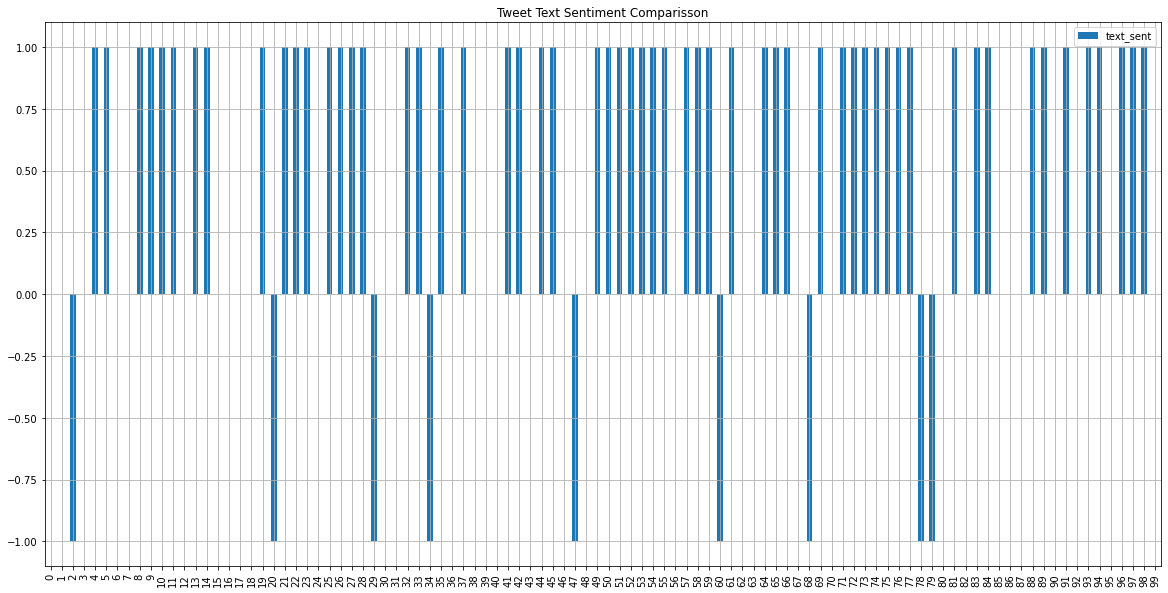

In [18]:
 # Plot bar chart
ethereum_df_text.plot(
    y=["text_sent"],
    kind="bar",
    title="Tweet Text Sentiment Comparisson",
    figsize=(20, 10),
    grid=True,
)

In [19]:
ethereum_df_text.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.250908,0.128080,0.853540,0.018380,0.480000
std,0.338701,0.129277,0.129928,0.050867,0.658741
min,-0.680800,0.000000,0.573000,0.000000,-1.000000
25%,0.000000,0.000000,0.746500,0.000000,0.000000
50%,0.273200,0.123000,0.864000,0.000000,1.000000
75%,0.514625,0.213250,1.000000,0.000000,1.000000
max,0.950900,0.403000,1.000000,0.239000,1.000000


In [20]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
ethereum_df_text['text']= ethereum_df_text['text'].apply(lambda x: stemming_on_text(x))
ethereum_df_text['text'].head()

0    OMNY BOMBER JACKET VR httpstcoMOw19A5LG via Yo...
1                         DeltaWGMI httpstco7ewhAwFHrH
2    RT Esi8095 Look I found Chaos collectible http...
3    VERY ethereum HOLDER receive FULL BAG OF eth b...
4    RT Typicxs ETHNFT Prize Giveaway Like amp Retw...
Name: text, dtype: object

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Generate the Bitcoin word cloud
# YOUR CODE HERE
token_text_df_ethereum = ethereum_df_text['token_text']
token_text_df_ethereum

0     [OMNY, BOMBER, JACKET, VR, httpstcoMOw19A5LG, ...
1                       [DeltaWGMI, httpstco7ewhAwFHrH]
2     [RT, Esi8095, Look, I, found, Chaos, collectib...
3     [VERY, ethereum, HOLDER, receive, FULL, BAG, O...
4     [RT, Typicxs, ETHNFT, Prize, Giveaway, Like, a...
                            ...                        
95    [When, ETH, move, leaving, ENTIRE, crypto, spa...
96    [RT, yearnagnostic, The, yield, Aggregator, Va...
97    [RT, metaqueenfc, 7, DAYS, OF, GIVEAWAYS, 2, W...
98    [I, caught10k, free, btc, bitcoin, btcUSD, DeF...
99    [Kaiterra, Sensedge, Mini, Air, Quality, Monit...
Name: token_text, Length: 100, dtype: object

In [22]:
ethereum_df_text_cloud = ' '.join(str(e) for e in token_text_df_ethereum)
ethereum_df_text_cloud

"['OMNY', 'BOMBER', 'JACKET', 'VR', 'httpstcoMOw19A5LG', 'via', 'YouTube', 'nfts', 'nft', 'nftcommunity', 'vr', 'ar', '3d', 'virtualfashion', 'metaverse', 'bitcoin', 'ethereum', 'metaquest2'] ['DeltaWGMI', 'httpstco7ewhAwFHrH'] ['RT', 'Esi8095', 'Look', 'I', 'found', 'Chaos', 'collectible', 'httpstcoynUTrEVNtt', 'rarible', 'ethereum', 'nonfungible', 'digitalasset', 'nft', 'rarible'] ['VERY', 'ethereum', 'HOLDER', 'receive', 'FULL', 'BAG', 'OF', 'eth', 'bitcoin', 'btc', 'altcoin', 'httpstcop8W87r5kdO'] ['RT', 'Typicxs', 'ETHNFT', 'Prize', 'Giveaway', 'Like', 'amp', 'Retweet', 'Follow', 'Typicxs', 'Notis', 'NFT', 'NFTGiveaway', 'Ethereum', 'Solana', 'SolanaNFTs', 'Solan'] ['RT', 'yearnagnostic', 'The', 'yield', 'Aggregator', 'Vault', 'total', 'seven', 'Binance', 'Ethereum', 'chain', 'strategy', 'create', 'highest', 'rate'] ['RT', 'CryptoListy', 'The', 'DuneAnalytics', 'platform', 'tool', 'dramatically', 'simplifies', 'process', 'It', 'webbased', 'platform', 'querying', 'E'] ['MMCrypto', 

<AxesSubplot:title={'center':'News Title and Text Sentiment Comparisson'}>

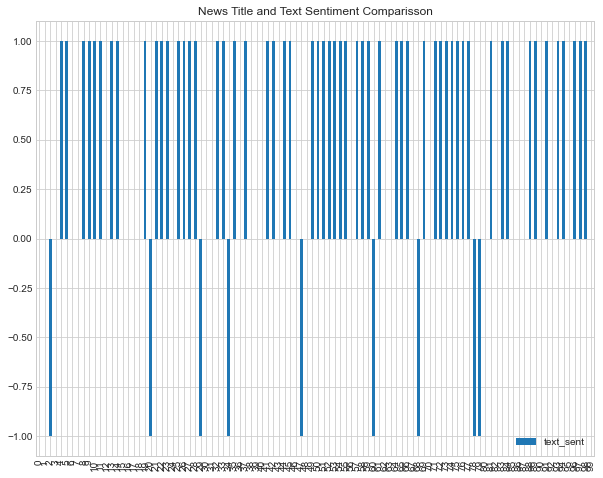

In [23]:
 # Plot bar chart
ethereum_df_text.plot(
    y=["text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [29]:
""" 100,000 ETHEREUM TWEET DATASET ANALYSIS """ 

ETHEREUM_tweets = Path("Resources_tweets/Ethereum_tweets.csv")
ETHEREUM_tweets = pd.read_csv(ETHEREUM_tweets, encoding="utf-8-sig")
ETHEREUM_tweets = ETHEREUM_tweets.drop(columns=['user_verified','user_location','is_retweet','source','hashtags'])
ETHEREUM_tweets

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,date,text
0,#1 Crypto Currency TRADING,"Profit thought trading, Learn , Trade & Earn💲....",2021-11-10 10:42:01+00:00,4,0,0,2021-11-15 07:26:39+00:00,Get upto 1000 that’s 10x with our premium spot...
1,Reyrey,Artist | NFT Broker & Collector for AnideaNFT ...,2011-03-07 07:22:57+00:00,343,650,589,2021-11-15 07:26:35+00:00,"Adopted a Hypocat #053, “Crazy Rich Cat” 🤑💵💵💵🤩..."
2,akter jahan,NaN,2021-10-28 13:28:05+00:00,1,2,0,2021-11-15 07:26:32+00:00,Top 10 Coins by Social Engagement over the las...
3,riyan,i always paricipated your project,2021-09-16 16:59:11+00:00,11,127,99,2021-11-15 07:26:30+00:00,Requesting faucet funds into 0x5278942b39deD8c...
4,Michelle Eriksen,"Art Creator, NFT, Crypto",2021-08-11 06:40:08+00:00,522,1428,16,2021-11-15 07:26:30+00:00,New Listing BTS 0.008ETH !! \n#NFTs #nftcolle...
...,...,...,...,...,...,...,...,...
9995,DAIANA LAZZARIN,#NFTartist #NFTcollector\nhttps://t.co/labmD20...,2020-03-28 23:42:49+00:00,1539,729,4403,2021-11-14 13:43:00+00:00,Pepe the gunman II\n\nhttps://t.co/xTOJSvLwX9 ...
9996,frieslips.nft,"Mr. Fries has the ability to be anyone, but we...",2021-01-23 07:40:12+00:00,74,190,95,2021-11-14 13:42:56+00:00,@missteennfts 🔥 TOODLER 1:1 EDITION 🔥\nPlease ...
9997,dave.,I draw something i into | NFT Artist ID 🇮🇩,2021-10-29 08:47:51+00:00,61,199,145,2021-11-14 13:42:42+00:00,Hello guys! mind to view my project at opensea...
9998,Crypto Whispers,Latest #cryptocurrencies news and market price...,2021-06-26 20:51:41+00:00,740,63,454,2021-11-14 13:42:31+00:00,Ethereum: One major misconception that will no...


In [28]:
# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
ETHEREUM_tweets['text'] = ETHEREUM_tweets['text'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
ETHEREUM_tweets['text']= ETHEREUM_tweets['text'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
ETHEREUM_tweets['text'] = ETHEREUM_tweets['text'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
ETHEREUM_tweets['text'] = ETHEREUM_tweets['text'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

ETHEREUM_tweets = ETHEREUM_tweets.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
ETHEREUM_tweets.head(20)

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,date,text,hashtags,source
0,#1 Crypto Currency TRADING,"Profit thought trading, Learn , Trade & Earn. ...",2021-11-10 10:42:01+00:00,4,0,0,2021-11-15 07:26:39+00:00,Get upto1000 thats10x premium spot trading sig...,nan,Twitter for Android
1,Reyrey,Artist | NFT Broker & Collector for AnideaNFT ...,2011-03-07 07:22:57+00:00,343,650,589,2021-11-15 07:26:35+00:00,Adopted Hypocat 053 Crazy Rich Cat hypocatclu...,"['SupportingCreators', 'CryptoArt', 'CryptoArt...",Twitter for iPhone
2,akter jahan,nan,2021-10-28 13:28:05+00:00,1,2,0,2021-11-15 07:26:32+00:00,Top10 Coins Social Engagement over last 24 hrs...,"['LunarCrush', 'bitcoin', 'dogecoin']",Twitter Web App
3,riyan,i always paricipated your project,2021-09-16 16:59:11+00:00,11,127,99,2021-11-15 07:26:30+00:00,Requesting faucet funds 0x5278942b39deD8cBDAD9...,"['Rinkeby', 'Ethereum']",Twitter Web App
4,Michelle Eriksen,"Art Creator, NFT, Crypto",2021-08-11 06:40:08+00:00,522,1428,16,2021-11-15 07:26:30+00:00,New Listing BTS 0008ETH NFTs nftcollector NFT...,"['NFTs', 'nftcollector', 'NFTCommunity', 'art'...",Twitter Web App
5,akter jahan,nan,2021-10-28 13:28:05+00:00,1,2,0,2021-11-15 07:25:51+00:00,Top10 Coins Social Volume over last 24 hrs Lun...,"['LunarCrush', 'bitcoin', 'shibainu', 'ethereum']",Twitter Web App
6,,nan,2021-11-15 07:18:23+00:00,0,1,0,2021-11-15 07:25:39+00:00,This First art purchase The cutest penguin NFT...,nan,Twitter for iPhone
7,"Lucas, Rarible.com: BricksNft - buy,yet cheap..","Brick's nft artist ,limited collections for va...",2021-07-14 10:45:01+00:00,76,1011,306,2021-11-15 07:25:36+00:00,Ive minted Waterfall graph collectible httpst...,"['rarible', 'ethereum', 'flow', 'nonfungible']",Twitter for Android
8,Stock Crypto News (Real-Time),"Get Real-Time Info about Live News, Signals an...",2021-08-19 10:51:41+00:00,158,15,2,2021-11-15 07:25:25+00:00,Crypto Prices USD Bitcoin 65103048 Ethereum ...,nan,Aida_bot
9,SURYAKAMAL,Goal \n\nMusic \n\nBike Rider \n\n +91895285...,2012-03-20 09:35:32+00:00,696,363,869,2021-11-15 07:25:14+00:00,You Cloud Mining using site httpstcoKgkt72UQA6...,"['mining', 'dogemining', 'trxmining', 'btcmini...",Twitter for Android


In [30]:
#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ETHEREUM_tweets.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
ETHEREUM_tweets = ETHEREUM_tweets.join(text_sentiment_df)

In [31]:
ETHEREUM_tweets

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,date,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,#1 Crypto Currency TRADING,"Profit thought trading, Learn , Trade & Earn💲....",2021-11-10 10:42:01+00:00,4,0,0,2021-11-15 07:26:39+00:00,Get upto 1000 that’s 10x with our premium spot...,0.0000,0.000,1.000,0.0,0
1,Reyrey,Artist | NFT Broker & Collector for AnideaNFT ...,2011-03-07 07:22:57+00:00,343,650,589,2021-11-15 07:26:35+00:00,"Adopted a Hypocat #053, “Crazy Rich Cat” 🤑💵💵💵🤩...",0.5983,0.145,0.855,0.0,1
2,akter jahan,NaN,2021-10-28 13:28:05+00:00,1,2,0,2021-11-15 07:26:32+00:00,Top 10 Coins by Social Engagement over the las...,0.6239,0.145,0.855,0.0,1
3,riyan,i always paricipated your project,2021-09-16 16:59:11+00:00,11,127,99,2021-11-15 07:26:30+00:00,Requesting faucet funds into 0x5278942b39deD8c...,0.0000,0.000,1.000,0.0,0
4,Michelle Eriksen,"Art Creator, NFT, Crypto",2021-08-11 06:40:08+00:00,522,1428,16,2021-11-15 07:26:30+00:00,New Listing BTS 0.008ETH !! \n#NFTs #nftcolle...,0.0000,0.000,1.000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,DAIANA LAZZARIN,#NFTartist #NFTcollector\nhttps://t.co/labmD20...,2020-03-28 23:42:49+00:00,1539,729,4403,2021-11-14 13:43:00+00:00,Pepe the gunman II\n\nhttps://t.co/xTOJSvLwX9 ...,0.0000,0.000,1.000,0.0,0
9996,frieslips.nft,"Mr. Fries has the ability to be anyone, but we...",2021-01-23 07:40:12+00:00,74,190,95,2021-11-14 13:42:56+00:00,@missteennfts 🔥 TOODLER 1:1 EDITION 🔥\nPlease ...,0.3182,0.084,0.916,0.0,1
9997,dave.,I draw something i into | NFT Artist ID 🇮🇩,2021-10-29 08:47:51+00:00,61,199,145,2021-11-14 13:42:42+00:00,Hello guys! mind to view my project at opensea...,0.7170,0.150,0.850,0.0,1
9998,Crypto Whispers,Latest #cryptocurrencies news and market price...,2021-06-26 20:51:41+00:00,740,63,454,2021-11-14 13:42:31+00:00,Ethereum: One major misconception that will no...,0.0000,0.000,1.000,0.0,0


In [37]:
ETHEREUM_tweets['date'] = pd.to_datetime(ETHEREUM_tweets['date'])
ETHEREUM_tweets

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,date,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,#1 Crypto Currency TRADING,"Profit thought trading, Learn , Trade & Earn💲....",2021-11-10 10:42:01+00:00,4,0,0,2021-11-15 07:26:39+00:00,Get upto 1000 that’s 10x with our premium spot...,0.0000,0.000,1.000,0.0,0
1,Reyrey,Artist | NFT Broker & Collector for AnideaNFT ...,2011-03-07 07:22:57+00:00,343,650,589,2021-11-15 07:26:35+00:00,"Adopted a Hypocat #053, “Crazy Rich Cat” 🤑💵💵💵🤩...",0.5983,0.145,0.855,0.0,1
2,akter jahan,NaN,2021-10-28 13:28:05+00:00,1,2,0,2021-11-15 07:26:32+00:00,Top 10 Coins by Social Engagement over the las...,0.6239,0.145,0.855,0.0,1
3,riyan,i always paricipated your project,2021-09-16 16:59:11+00:00,11,127,99,2021-11-15 07:26:30+00:00,Requesting faucet funds into 0x5278942b39deD8c...,0.0000,0.000,1.000,0.0,0
4,Michelle Eriksen,"Art Creator, NFT, Crypto",2021-08-11 06:40:08+00:00,522,1428,16,2021-11-15 07:26:30+00:00,New Listing BTS 0.008ETH !! \n#NFTs #nftcolle...,0.0000,0.000,1.000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,DAIANA LAZZARIN,#NFTartist #NFTcollector\nhttps://t.co/labmD20...,2020-03-28 23:42:49+00:00,1539,729,4403,2021-11-14 13:43:00+00:00,Pepe the gunman II\n\nhttps://t.co/xTOJSvLwX9 ...,0.0000,0.000,1.000,0.0,0
9996,frieslips.nft,"Mr. Fries has the ability to be anyone, but we...",2021-01-23 07:40:12+00:00,74,190,95,2021-11-14 13:42:56+00:00,@missteennfts 🔥 TOODLER 1:1 EDITION 🔥\nPlease ...,0.3182,0.084,0.916,0.0,1
9997,dave.,I draw something i into | NFT Artist ID 🇮🇩,2021-10-29 08:47:51+00:00,61,199,145,2021-11-14 13:42:42+00:00,Hello guys! mind to view my project at opensea...,0.7170,0.150,0.850,0.0,1
9998,Crypto Whispers,Latest #cryptocurrencies news and market price...,2021-06-26 20:51:41+00:00,740,63,454,2021-11-14 13:42:31+00:00,Ethereum: One major misconception that will no...,0.0000,0.000,1.000,0.0,0


In [32]:
""" SAVE AS CSV FOR MORE ANALYSIS """

ETHEREUM_tweets.to_csv("Results\generalpop_ethereum_sentiment_analysis_bigdataset.csv")